<a href="https://colab.research.google.com/github/kabta/Twitter-Sentiment-Analysis-Sentiment140-dataset/blob/main/ML_Miniproject2_Kabita_adhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary utilities**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data_url="https://raw.githubusercontent.com/kabta/Twitter-Sentiment-Analysis-Sentiment140-dataset/main/Sentiment140.tenPercent.sample.tweets.tsv"

df_tweets = pd.read_table(data_url, usecols=['sentiment_label', 'tweet_text'])

In [4]:
df_tweets

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...
...,...,...
159995,0,STILL @ panera...studying for &quot;mock&quot;...
159996,0,Insomnia is out of control tonight--haven't sl...
159997,4,@Covergirl08 I take pride in what I do
159998,4,heading to work on the 6


In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
np.sum(df_tweets.isnull().any(axis=1))

0

# **Data Preprocessing**

Positive    80000
Negative    80000
Name: sentiment_label, dtype: int64


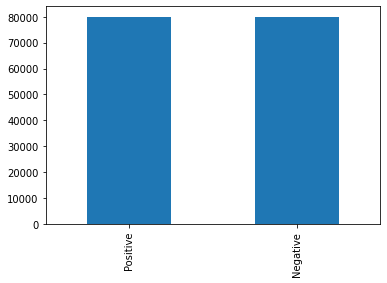

In [7]:
# Visualising the distribution of the sentiment label.
sentiment ={0:"Negative",4:"Positive"}
print(df_tweets.sentiment_label.apply(lambda x:sentiment[x]).value_counts())
df_tweets.sentiment_label.apply(lambda x:sentiment[x]).value_counts().plot(kind ='bar')
plt.show()


In [8]:
#selecting a subset of 50k entries and also maintaining the ratio of positive and negative sentiment label
data_pos = df_tweets[df_tweets['sentiment_label']==4]
data_neg = df_tweets[df_tweets['sentiment_label']==0]

data_pos = data_pos.iloc[:int(25000)]
data_neg = data_neg.iloc[:int(25000)]

dataset = pd.concat([data_pos, data_neg])
print(len(dataset))
dataset.head(5)

50000


,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
6,4,With God on ur side anything is possible....
10,4,the video on VH1 is much better than the u tub...
14,4,@ AshleyLTMSYF Hey Ashley when will the Hush ...


# **Cleaning Data using stop wordss, Snowball Stemmer and function defining the cleaning and processing of tweets**

In [9]:
#Cleaning data 
# Define the set of stop words to remove
stop_words = set(stopwords.words('english'))

# Define the stemmer to use
stemmer = SnowballStemmer('english')

# Define a function to clean and preprocess a single tweet
def tweets_clean(Tweets):
  # Remove URLs
    Tweets = re.sub(r'http\S+', '', Tweets)
    # Remove usernames
    Tweets = re.sub(r'@[^\s]+', '', Tweets)
    # Remove hashtags
    Tweets = re.sub(r'#([^\s]+)', '', Tweets)
    # remove punctuations and numbers
    Tweets = re.sub("[^a-zA-Z]"," ", Tweets)
    Tweets = re.sub('[\s]+', ' ', Tweets)
    # remove whitespaces
    Tweets = ' '.join(Tweets.split())
    Tweets = Tweets.strip('...')
    Tweets = Tweets.replace('-',' ')
    Tweets = Tweets.replace('.',' ')
    Tweets = Tweets.replace(',',' ')
    Tweets = Tweets.replace('?',' ')
    Tweets = Tweets.replace(';',' ')
    Tweets = Tweets.replace('$','dollar ')
    Tweets = Tweets.replace('"',' ')
    Tweets = Tweets.replace('!',' ')
    Tweets = Tweets.replace('#','  ')
    Tweets = Tweets.replace('&',' ')
    Tweets = Tweets.replace("’", "'").replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
    tokens = word_tokenize(Tweets)
    # Remove stop words and punctuation, and convert to lowercase
    tokens = [stemmer.stem(token.lower()) for token in tokens if token not in stop_words and token not in string.punctuation]
    # Join the tokens back into a string
    Tweets = ' '.join(tokens)
    return Tweets
#Apply text cleaning function to text column in df_tweets dataframe
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x:tweets_clean(x))

In [10]:
dataset['sentiment_label'] = dataset['sentiment_label'].apply(lambda x: 1 if x==4 else 0)

In [11]:
dataset

,sentiment_label,tweet_text
0,1,hey dear happi friday you alreadi rice bowl lunch
1,1,ughhh layin downnnn wait zeina cook breakfast
6,1,with god ur side anyth possibl
10,1,video vh much better u tube one
14,1,ashleyltmsyf hey ashley hush hush hush hush vi...
...,...,...
49732,0,wish love luci dvd mom im mood laugh luv oldi ...
49735,0,tri download new iphon softwar let majorsadfac
49736,0,it soooooooo hot outsid as hot i rememb austra...
49742,0,day school wish wouldnt end im gunna miss ever...


# **EDA showing the most repeted words in whole dataset which are splitted into negative and positive tweets**

In [12]:
# Spliting dataset to negatives and positives for EDA
negatives=dataset['sentiment_label']==0
positives=dataset['sentiment_label']==1

# Number of words for each tweet
dataset['No_of_Words']=[len(text.split()) for text in dataset['tweet_text']]

In [13]:
dataset['Words'] = dataset['tweet_text'].apply(lambda x:str(x).split())

top_pos = Counter([word for text in dataset[positives]['Words'] for word in text])
top_pos_df=pd.DataFrame(top_pos.most_common(100),columns=['Words','Counts'])

top_neg = Counter([word for text in dataset[negatives]['Words'] for word in text])
top_neg_df=pd.DataFrame(top_neg.most_common(100),columns=['Words','Counts'])

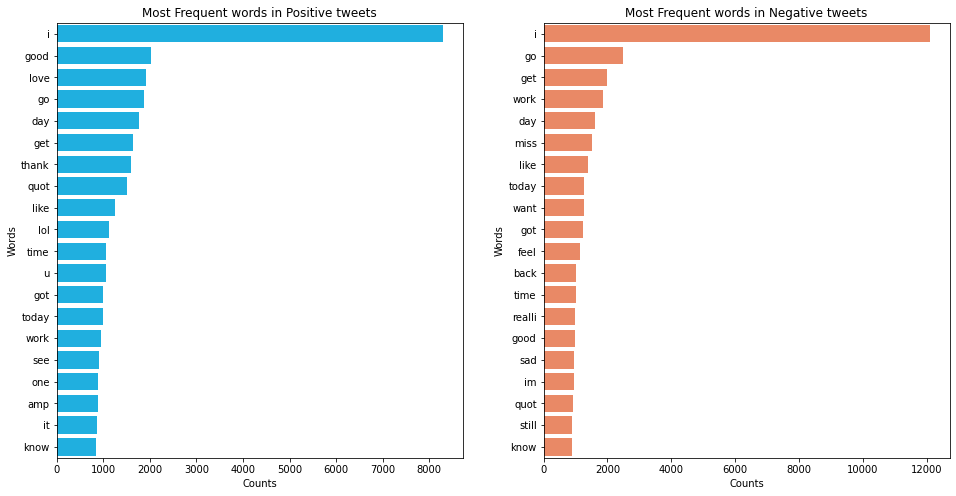

In [14]:

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
sns.barplot(y='Words',x='Counts',data=top_pos_df[:20],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_neg_df[:20],color='coral',ax=ax[1])
ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")
plt.show()

# **Splitting data into training and test**

In [15]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import gensim
from keras.preprocessing.text import Tokenizer

In [17]:
Train_size = 0.7
MAX_NB_WORDS = 100000
max_len = 100

In [18]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train,x_test,y_train,y_test = train_test_split(dataset['tweet_text'],dataset['sentiment_label'] , test_size=.3, random_state=42)

In [19]:
y_train

26087    0
31254    0
48598    0
21425    0
33354    0
        ..
22674    1
39398    0
26231    0
1756     1
31601    1
Name: sentiment_label, Length: 35000, dtype: int64

# **Tokenize the tweets and pad the sequences to a fixed length**


In [20]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index


# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1


x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = max_len)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = max_len)


# **Embedding** 

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/gdrive/MyDrive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [23]:
embedding_matrix = zeros((100000, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [24]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.046539  ,  0.61966002,  0.56647003, ..., -0.37616   ,
        -0.032502  ,  0.80620003],
       [-0.078894  ,  0.46160001,  0.57779002, ...,  0.26352   ,
         0.59397   ,  0.26741001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# **LSTM**

In [25]:

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

In [26]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, weights=[embedding_matrix], output_dim=100, input_length=max_len))
model.add(LSTM(128))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          10000000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,117,377
Trainable params: 10,117,377
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
1094/1094 [==============================] - 509s 463ms/step - loss: 0.5434 - accuracy: 0.7211 - val_loss: 0.5037 - val_accuracy: 0.7477
Epoch 2/10
1094/1094 [==============================] - 571s 522ms/step - loss: 0.4367 - accuracy: 0.7986 - val_loss: 0.5097 - val_accuracy: 0.7541
Epoch 3/10
1094/1094 [==============================] - 530s 484ms/step - loss: 0.3549 - accuracy: 0.8439 - val_loss: 0.5547 - val_accuracy: 0.7445
Epoch 4/10
1094/1094 [==============================] - 503s 460ms/step - loss: 0.2855 - accuracy: 0.8776 - val_loss: 0.6206 - val_accuracy: 0.7307
Epoch 5/10
1094/1094 [==============================] - 500s 457ms/step - loss: 0.2228 - accuracy: 0.9050 - val_loss: 0.7507 - val_accuracy: 0.7310
Epoch 6/10
1094/1094 [==============================] - 504s 461ms/step - loss: 0.1738 - accuracy: 0.9276 - val_loss: 0.8592 - val_accuracy: 0.7253
Epoch 7/10
1094/1094 [==============================] - 495s 453ms/step - loss: 0.1350 - accuracy: 0.9429 - val_

In [30]:
score = model.evaluate(x_test, y_test, verbose=1)

469/469 [==============================] - 32s 68ms/step - loss: 1.5160 - accuracy: 0.7157


In [32]:

print("Test Accuracy:", score[1])


Test Accuracy: 0.715666651725769


# **Visualizing model accuracy and model loss**




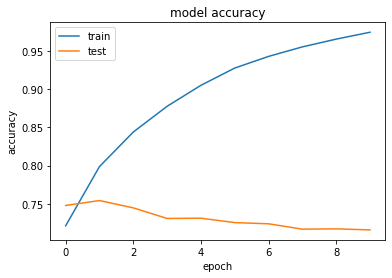

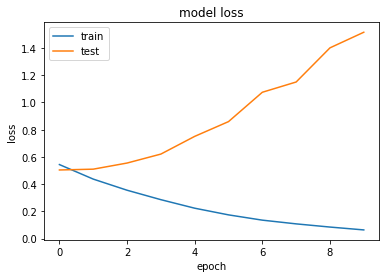

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# **CNN**

In [34]:

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout

from sklearn.metrics import accuracy_score, confusion_matrix


In [35]:
modelCNN = Sequential()
modelCNN.add(Embedding(input_dim=MAX_NB_WORDS, weights=[embedding_matrix], output_dim=100, input_length=max_len))
modelCNN.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
modelCNN.add(GlobalMaxPooling1D())
modelCNN.add(Dense(units=64, activation='relu'))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(units=1, activation='sigmoid'))



In [36]:
modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
print(modelCNN.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          10000000  
                                                                 
 conv1d (Conv1D)             (None, 98, 32)            9632      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                      

In [38]:
historyCNN = modelCNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1094/1094 [==============================] - 273s 248ms/step - loss: 0.5941 - accuracy: 0.6719 - val_loss: 0.5312 - val_accuracy: 0.7329
Epoch 2/10
1094/1094 [==============================] - 268s 245ms/step - loss: 0.4798 - accuracy: 0.7750 - val_loss: 0.5215 - val_accuracy: 0.7364
Epoch 3/10
1094/1094 [==============================] - 267s 244ms/step - loss: 0.3883 - accuracy: 0.8295 - val_loss: 0.5599 - val_accuracy: 0.7391
Epoch 4/10
1094/1094 [==============================] - 265s 242ms/step - loss: 0.2859 - accuracy: 0.8805 - val_loss: 0.6666 - val_accuracy: 0.7160
Epoch 5/10
1094/1094 [==============================] - 269s 245ms/step - loss: 0.1968 - accuracy: 0.9219 - val_loss: 0.7767 - val_accuracy: 0.7192
Epoch 6/10
1094/1094 [==============================] - 266s 244ms/step - loss: 0.1374 - accuracy: 0.9474 - val_loss: 0.9674 - val_accuracy: 0.7142
Epoch 7/10
1094/1094 [==============================] - 265s 242ms/step - loss: 0.1011 - accuracy: 0.9611 - val_

In [40]:
# Evaluate the model on the test set
scoreCNN = modelCNN.evaluate(x_test, y_test, verbose=0)

In [41]:
print('Test accuracy:', scoreCNN[1])

Test accuracy: 0.7020000219345093


# **Visualizing model accuracy and model loss**


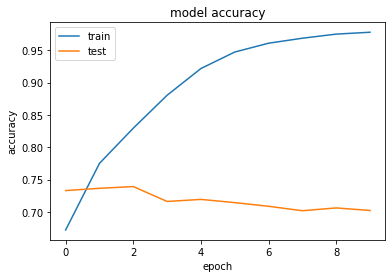

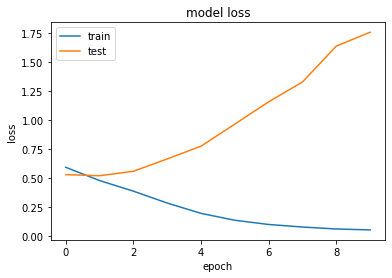

In [42]:
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()